In [7]:
# import libraries

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma

import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import glob

print ('libraries imported')

libraries imported


In [8]:
#read all diff sst spatialmean jja (SST) files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_sst/jja"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP4_historical_diff_sst_spatialmean_jja.nc',
 'PMIP4_piControl_diff_sst_spatialmean_jja.nc']

In [3]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('bwr') #define colour map
    clim=[-5,5]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    #gl.xlabels_bottom = False
    gl.ylabels_left = False
    gl.ylabels_right = False 
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.77)
    cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
    cb.set_label(label='Mean SST Bias ($^{\circ}$C)', size=20)
    plt.savefig(filename,bbox_inches='tight',pad_inches = 0.02)
    

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDepre

masked_array(
  data=[[       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        ...,
        [0.66421265, 0.66388071, 0.6635334 , ..., 0.66495162, 0.66455728,
         0.66421265],
        [0.6625038 , 0.66235796, 0.66221538, ..., 0.66285791, 0.66266913,
         0.6625038 ],
        [0.66311825, 0.66307893, 0.66304635, ..., 0.66319827, 0.66316185,
         0.66311825]],
  mask=False,
  fill_value=1e+20)

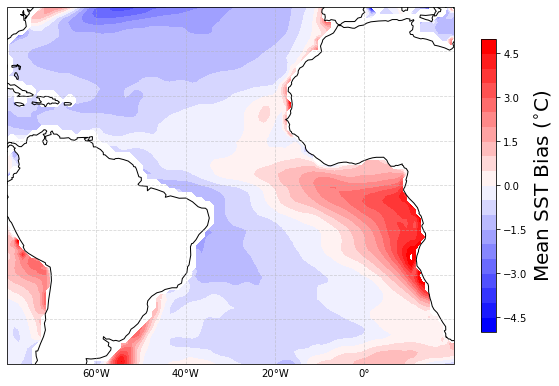

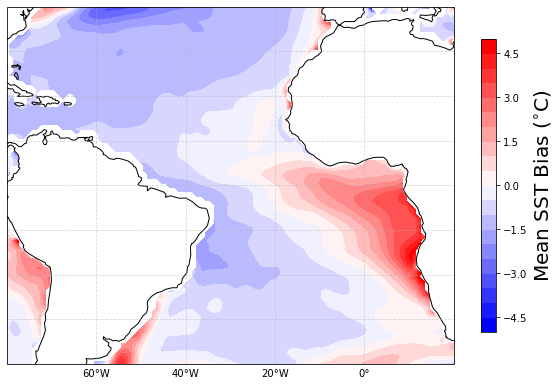

In [4]:
#open datasets
variable_name= 'sst_spatialmean_jja'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_sst/jja/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/diff_sst/jja/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

In [9]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('bwr') #define colour map
    clim=[-5,5]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = True
    gl.ylabels_right = False 
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    #cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.77)
    #cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
    #ax.set_label(label='Mean SST Bias ($^{\circ}$C)', size=20)
    plt.savefig(filename,bbox_inches='tight',pad_inches = 0.02)
    

In [6]:
#read all diff sst spatialmean djf (SST) files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_sst/djf"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP4_historical_diff_sst_spatialmean_djf.nc',
 'PMIP4_piControl_diff_sst_spatialmean_djf.nc']

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning

masked_array(
  data=[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [ 0.00000000e+00,  5.22457894e-17, -1.30614473e-17, ...,
          2.61228947e-17,  1.30614473e-17,  0.00000000e+00],
        [ 0.00000000e+00, -2.08983158e-16, -3.91843420e-17, ...,
         -2.74290394e-16,  2.61228947e-17,  0.00000000e+00],
        [-1.04491579e-15, -6.79195262e-16, -9.27362762e-16, ...,
         -6.92256709e-16, -1.08410013e-15, -1.04491579e-15]],
  mask=False,
  fill_value=1e+20)

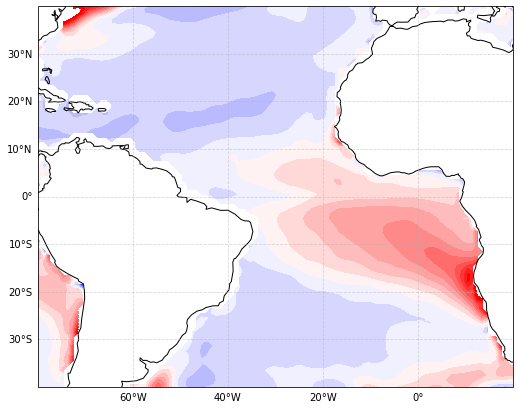

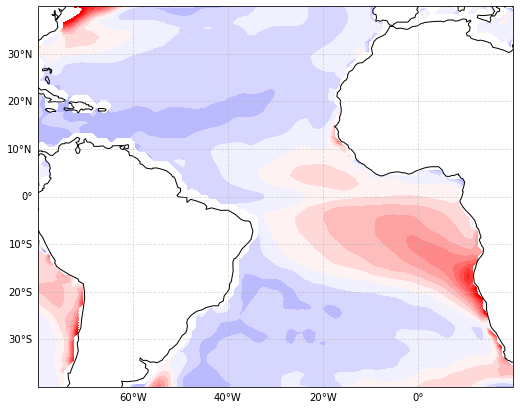

In [7]:
#open datasets
variable_name= 'sst_spatialmean_djf'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_sst/djf/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/diff_sst/djf/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

In [10]:
#read all diff sst spatialmean mam (SST) files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_sst/mam"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP4_historical_diff_sst_spatialmean_mam.nc',
 'PMIP4_piControl_diff_sst_spatialmean_mam.nc']

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning

masked_array(
  data=[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [ 0.00000000e+00,  5.22457894e-17, -1.30614473e-17, ...,
          2.61228947e-17,  1.30614473e-17,  0.00000000e+00],
        [ 0.00000000e+00, -2.08983158e-16, -3.91843420e-17, ...,
         -2.74290394e-16,  2.61228947e-17,  0.00000000e+00],
        [-1.04491579e-15, -6.79195262e-16, -9.27362762e-16, ...,
         -6.92256709e-16, -1.08410013e-15, -1.04491579e-15]],
  mask=False,
  fill_value=1e+20)

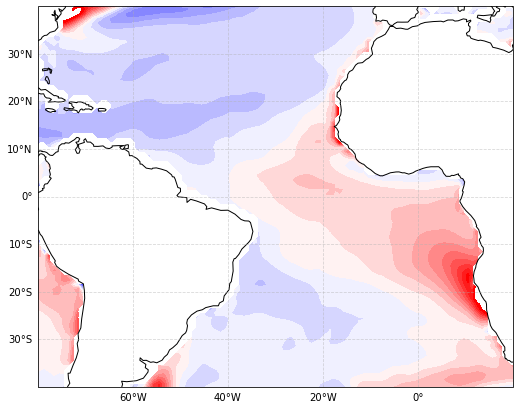

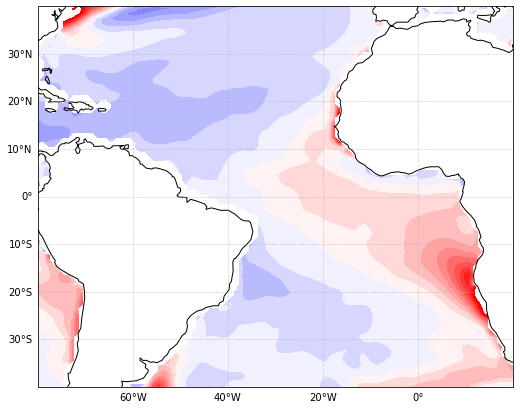

In [11]:
#open datasets
variable_name= 'sst_spatialmean_mam'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_sst/mam/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/diff_sst/mam/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

In [46]:
#dont need these figs

def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('bwr') #define colour map
    clim=[-2,2]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = True
    gl.ylabels_right=False 
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.77)
    cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
    cb.set_label(label='SST Anomaly ($^\circ$C / $^\circ$C)', size=20)
    plt.savefig(filename, bbox_inches='tight',pad_inches = 0)

In [9]:
#read all diff amm pattern mon (SST) files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_sst/amm"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP4_piControl_diff_amm_pattern_mon.nc',
 'PMIP4_historical_diff_amm_pattern_mon.nc']

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDepre

masked_array(
  data=[[       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        ...,
        [0.00515371, 0.00513092, 0.00505549, ..., 0.00515564, 0.00515022,
         0.00515371],
        [0.00523661, 0.00522031, 0.00518892, ..., 0.00527362, 0.00525028,
         0.00523661],
        [0.00540676, 0.00552408, 0.00538026, ..., 0.00543397, 0.00541798,
         0.00540676]],
  mask=False,
  fill_value=1e+20)

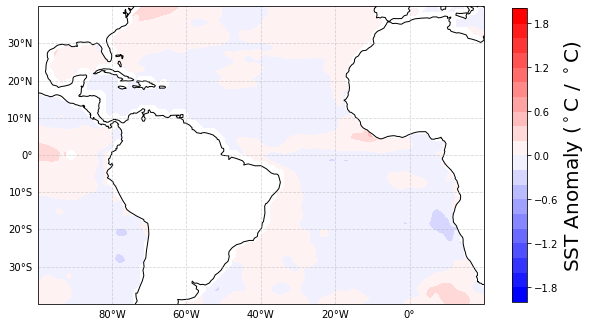

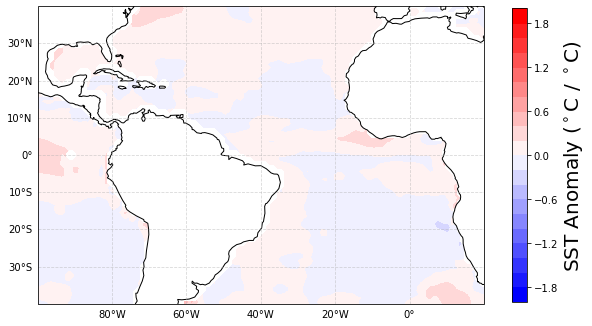

In [10]:
#open datasets
variable_name= 'amm_pattern_mon'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_sst/amm/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/diff_sst/amm/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

In [11]:
#read all diff atl3 pattern mon (SST) files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_sst/atl3"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP4_piControl_atl3_pattern_mon.nc',
 'PMIP4_piControl_diff_atl3_pattern_mon.nc',
 'PMIP4_historical_diff_atl3_pattern_mon.nc',
 'PMIP4_historical_atl3_pattern_mon.nc']

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDepre

masked_array(
  data=[[       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        ...,
        [0.00573743, 0.00581117, 0.00583141, ..., 0.00562323, 0.00566357,
         0.00573743],
        [0.00531137, 0.00535419, 0.00537396, ..., 0.0052637 , 0.0052772 ,
         0.00531137],
        [0.00511683, 0.00512536, 0.0051346 , ..., 0.00511257, 0.00511303,
         0.00511683]],
  mask=False,
  fill_value=1e+20)

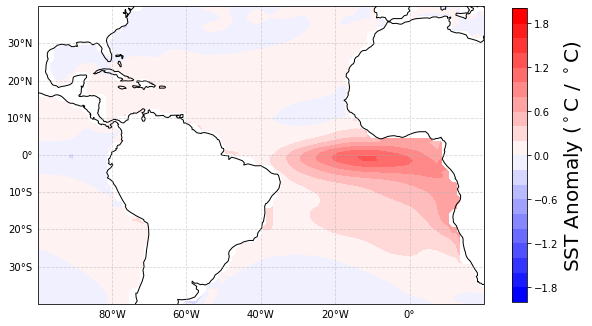

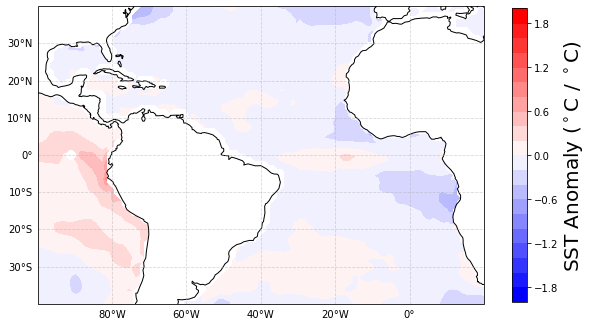

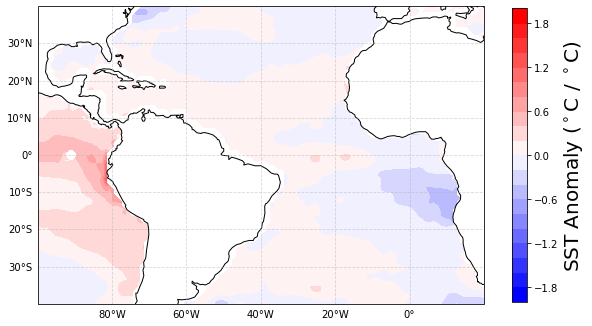

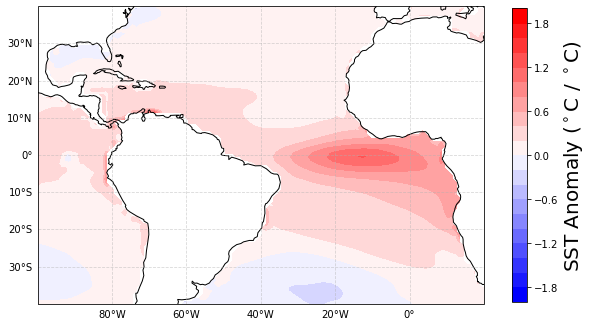

In [47]:
#open datasets
variable_name= 'atl3_pattern_mon'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_sst/atl3/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/diff_sst/atl3/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot